<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-расчёта-эффективности-восстановления" data-toc-modified-id="Проверка-расчёта-эффективности-восстановления-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчёта эффективности восстановления</a></span></li><li><span><a href="#Анализ-отсутствующих-признаков-в-тестовой-выборке" data-toc-modified-id="Анализ-отсутствующих-признаков-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ отсутствующих признаков в тестовой выборке</a></span></li><li><span><a href="#Заполнение-пропущенных-значений" data-toc-modified-id="Заполнение-пропущенных-значений-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Заполнение пропущенных значений</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов" data-toc-modified-id="Анализ-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Разделение-данных-для-обучения" data-toc-modified-id="Разделение-данных-для-обучения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Разделение данных для обучения</a></span></li><li><span><a href="#Выбор-модели-при-помощи-кросс-валидации" data-toc-modified-id="Выбор-модели-при-помощи-кросс-валидации-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выбор модели при помощи кросс-валидации</a></span></li><li><span><a href="#Проверка-качества-модели" data-toc-modified-id="Проверка-качества-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка качества модели</a></span></li><li><span><a href="#Проверка-модели-на-вменяемость" data-toc-modified-id="Проверка-модели-на-вменяемость-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка модели на вменяемость</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

### Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor

In [2]:
df_train = pd.read_csv('/gold_recovery_train_new.csv', index_col='date')

In [3]:
df_test = pd.read_csv('/gold_recovery_test_new.csv', index_col='date')

In [4]:
df_full = pd.read_csv('/gold_recovery_full_new.csv', index_col='date')

In [5]:
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [7]:
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [9]:
df_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

**Выводы**

Данные представляют собой три набора данных:
1.	Обучающую выборку.
2.	Тестовую выборку.
3.	Исходный датасет, который содержит обучающую и тестовую выборки со всеми признаками.

В тестовой выборке отсутствуют некоторые признаки, которые есть  в обучающем наборе данных. Это связанно с тем, что некоторые параметры  замеряются и/или рассчитываются значительно позже. Также в тестовом наборе нет целевых признаков. 

Во всех трех наборах данных есть пропущенные значения.

### Проверка расчёта эффективности восстановления 

Рассчитаем эффективность восстановления золота на выходе из флотационной установки для обучающей выборки.

In [11]:
rougher_output_recovery = ((df_train['rougher.output.concentrate_au'] * 
                           (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) / 
                           (df_train['rougher.input.feed_au'] * 
                           (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100)

Найдем MAE между рассчитанным значение эффективности восстановления золота и представленным в таблице.

In [12]:
mean_absolute_error(df_train['rougher.output.recovery'], rougher_output_recovery)

9.73512347450521e-15

**Выводы**

Значение MAE практически равно нулю, значит, эффективность восстановления золота, представленная в таблице, была рассчитана правильно.

### Анализ отсутствующих признаков в тестовой выборке 

Найдем список признаков, которые отсутствуют в тестовой выборке.

In [13]:
missed_columns = []
for col in list(df_full.columns):
    if col not in list(df_test.columns):
        missed_columns.append(col)

In [14]:
missed_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

**Выводы**

В тестовой выборке отсутствуют следующие группы признаков:
1. Расчетные и выходные значения концентратов и хвостов для флотационной установки.
2. Эффективность восстановления золота после флотационной установки.
3. Выходные значения концентратов и хвостов после первого этапа очистки.
4. Выходные значения хвостов после второго этапа очистки.
5. Финальные значения концентратов и хвостов.
6. Финальная эффективность восстановления золота.

### Заполнение пропущенных значений

По условиям задания соседние по времени параметры часто похожи. Поэтому заполним пропуски предыдущими значениями. 

In [15]:
df_full = df_full.fillna(method='ffill')
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

## Анализ данных

### Анализ концентрации металлов

Выполним анализ средней концентрации металлов (золота, серебра и свинца):
- перед флотацией (`rougher.input.feed`);
- после флотации (`rougher.output.concentrate`);
- после первичной очистки (`primary_cleaner.output.concentrate`);
- после вторичной очистки (`final.output.concentrate`).

In [16]:
au = ['rougher.input.feed_au', 
      'rougher.output.concentrate_au', 
      'primary_cleaner.output.concentrate_au', 
      'final.output.concentrate_au']

ag = ['rougher.input.feed_ag', 
      'rougher.output.concentrate_ag', 
      'primary_cleaner.output.concentrate_ag', 
      'final.output.concentrate_ag']

pb = ['rougher.input.feed_pb', 
      'rougher.output.concentrate_pb', 
      'primary_cleaner.output.concentrate_pb', 
      'final.output.concentrate_pb']

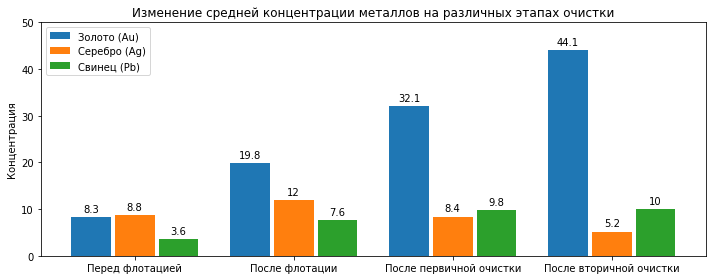

In [17]:
labels = ['Перед флотацией', 'После флотации', 'После первичной очистки', 'После вторичной очистки']
y_au = round(df_full[au].mean(), 1)
y_ag = round(df_full[ag].mean(), 1)
y_pb = round(df_full[pb].mean(), 1)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 4))
au_bar = ax.bar(x - 1.1*width, y_au, width, label='Золото (Au)')
ag_bar = ax.bar(x, y_ag, width, label='Серебро (Ag)')
pb_bar = ax.bar(x + 1.1*width, y_pb, width, label='Свинец (Pb)')

ax.set_title('Изменение средней концентрации металлов на различных этапах очистки')
ax.set_ylabel('Концентрация')
ax.set_ylim(0, 50)
ax.set_xticks(x, labels)
ax.legend(loc='upper left')

ax.bar_label(au_bar, padding=3)
ax.bar_label(ag_bar, padding=3)
ax.bar_label(pb_bar, padding=3)

fig.tight_layout()

plt.show()

**Выводы**

Средняя концентрация золота увеличивается от этапа к этапу очистки: 8,3 - 19,8 - 32,1 - 44.1.

Средняя концентрация серебра увеличивается после флотации, а потом снижается: 8,8 - 12,0 - 8,4 - 5,2.

Средняя концентрация свинца растет до этапа вторичной очистки, а после вторичной очистки прирост незначителен: 3,6 - 7,6 - 9,8 - 10,0.

### Сравнение распределения размеров гранул сырья  

Выполним сравнение распределения размеров гранул сырья на обучающей и тестовой выборках:
- на входе во флотационную установку (`rougher.input.feed_size`);
- перед первым этапом очистки (`primary_cleaner.input.feed_size`).

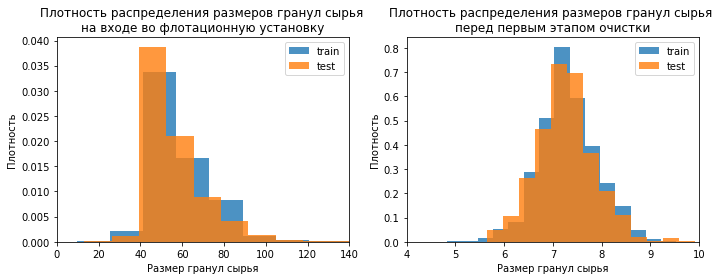

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax1.hist(df_train['rougher.input.feed_size'], bins=30, alpha=0.8, density=True, label='train')
ax1.hist(df_test['rougher.input.feed_size'], bins=30, alpha=0.8, density=True, label='test')
ax1.set_title('''Плотность распределения размеров гранул сырья 
на входе во флотационную установку''')
ax1.set_ylabel('Плотность')
ax1.set_xlabel('Размер гранул сырья')
ax1.set_xlim(0, 140)
ax1.legend()

ax2.hist(df_train['primary_cleaner.input.feed_size'], bins=30, alpha=0.8, density=True, label='train')
ax2.hist(df_test['primary_cleaner.input.feed_size'], bins=30, alpha=0.8, density=True, label='test')
ax2.set_title('''Плотность распределения размеров гранул сырья 
перед первым этапом очистки''')
ax2.set_ylabel('Плотность')
ax2.set_xlabel('Размер гранул сырья')
ax2.set_xlim(4, 10)
ax2.legend()

fig.tight_layout()

plt.show()

**Выводы**

Для обучающей и тестовой выборок распределения размером гранул сырья совпадают и находятся в диапазоне: 
- от 40 до 90 - на входе во флотационную установку;
- от 6 до 9 - перед первым этапом очистки.

### Исследование суммарной концентрации всех веществ  

Выполним исследование суммарной концентрации всех веществ: 
- в сырье (`rougher.input.feed`); 
- в черновом концентрате (`rougher.output.concentrate`);
- в финальном концентрате (`final.output.concentrate`).

In [19]:
rougher_input_feed_total = df_full[['rougher.input.feed_au', 
                                    'rougher.input.feed_ag', 
                                    'rougher.input.feed_pb', 
                                    'rougher.input.feed_sol']].sum(axis=1)

rougher_output_concentrate_total = df_full[['rougher.output.concentrate_au', 
                                            'rougher.output.concentrate_ag', 
                                            'rougher.output.concentrate_pb', 
                                            'rougher.output.concentrate_sol']].sum(axis=1)

final_output_concentrate_total = df_full[['final.output.concentrate_au', 
                                          'final.output.concentrate_ag', 
                                          'final.output.concentrate_pb', 
                                          'final.output.concentrate_sol']].sum(axis=1)

In [20]:
sum_concentrations = pd.DataFrame({'rougher.input.feed_total': rougher_input_feed_total,
                                   'rougher.output.concentrate_total': rougher_output_concentrate_total,
                                   'final.output.concentrate_total': final_output_concentrate_total})

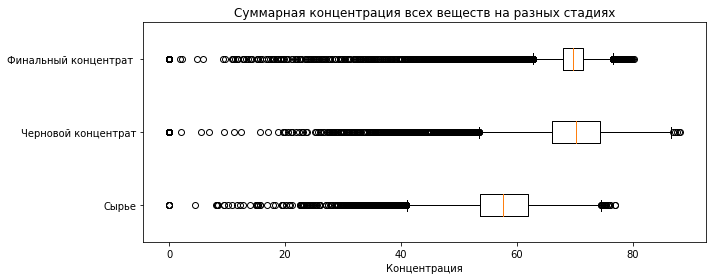

In [21]:
labels = ['Сырье', 'Черновой концентрат', 'Финальный концентрат ']

fig, ax = plt.subplots(figsize=(10, 4))

ax.boxplot(sum_concentrations, vert=False, labels=labels)
ax.set_title('Суммарная концентрация всех веществ на разных стадиях')
ax.set_xlabel('Концентрация')

fig.tight_layout()

plt.show()

In [22]:
for col, name in zip(sum_concentrations.columns, labels):
    print(f'{name}: {(sum_concentrations == 0)[col].mean():.2%}')

Сырье: 0.00%
Черновой концентрат: 2.03%
Финальный концентрат : 0.50%


**Выводы**

Мы видим, что наблюдаются аномальные значения, равные нулевой концентрации. Общая доля таких значений для всех данных составляет 2,5 %. Удалим эти данные из обучающей и тестовой выборок.

In [23]:
index_to_del = sum_concentrations[(sum_concentrations['rougher.output.concentrate_total'] == 0) |
                                  (sum_concentrations['final.output.concentrate_total'] == 0)].index

In [24]:
df_train = df_train[~(df_train.index.isin(index_to_del))]
df_test = df_test[~(df_test.index.isin(index_to_del))]

## Модель

### Функция для вычисления итоговой sMAPE

Напишем функцию для расчета метрики sMAPE.

In [25]:
def smape(y_target, y_pred):
    return 1 / len(y_target) * sum(np.abs(y_target - y_pred) / ((np.abs(y_target) + np.abs(y_pred)) * 0.5)) * 100

Напишем функцию для расчета итоговой sMAPE. 

In [26]:
def smape_total(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

### Разделение данных для обучения

Т.к. по условиям задания тестовая выборка содержит только актуальные признаки (т.е. те, которые есть здесь и сейчас), то для обучения моделей будем использовать именно эти признаки. 

Причем:
- для целевого признака `rougher.output.recovery` будем использовать только признаки, относящиеся к процессу флотации;
- для целевого признака `final.output.recovery` будем использовать все признаки.

In [27]:
# список столбцов для целевого признака 'rougher.output.recovery'
col_for_rougher = list(col for col in df_test.columns if 'rougher' in col)

# список столбцов для целевого признака 'final.output.recovery'
col_for_final = list(df_test.columns)

In [28]:
X_train_rougher = df_train[col_for_rougher].copy()
y_train_rougher = df_train['rougher.output.recovery'].copy()

X_train_final = df_train[col_for_final].copy()
y_train_final = df_train['final.output.recovery'].copy()

X_test_rougher = df_test[col_for_rougher].copy()
y_test_rougher = df_full.loc[df_test.index, 'rougher.output.recovery'].copy()

X_test_final = df_test.copy()
y_test_final = df_full.loc[df_test.index, 'final.output.recovery'].copy()

### Выбор модели при помощи кросс-валидации

Оценку и выбор лучшей модели произведем при помощи кросс-валидации. Для оценки будем использовать следующие модели:
- линейную регрессию;
- регрессионное дерево решений;
- регрессионный градиентный бустинг.

Для скоринга применим нашу функцию `smape`.

In [29]:
kfold = KFold(n_splits=5, shuffle=True, random_state=12345)

In [30]:
scorer = make_scorer(smape, greater_is_better=True)

In [31]:
LR = LinearRegression()

In [32]:
DTR = DecisionTreeRegressor(random_state=12345)

In [33]:
GBR = GradientBoostingRegressor(random_state=12345)

In [34]:
models = {'LinearRegression': LR, 
          'DecisionTreeRegressor': DTR, 
          'GradientBoostingRegressor': GBR}

In [35]:
for name, model in models.items():
    score_rouhger = cross_val_score(model, X_train_rougher, y_train_rougher, scoring=scorer, cv=kfold).mean()
    score_final = cross_val_score(model, X_train_final, y_train_final, scoring=scorer, cv=kfold).mean()
    print(f'Итоговая sMAPE для {name}: {smape_total(score_rouhger, score_final):.2} %')

Итоговая sMAPE для LinearRegression: 7.4 %
Итоговая sMAPE для DecisionTreeRegressor: 7.1 %
Итоговая sMAPE для GradientBoostingRegressor: 6.2 %


**Выводы**

Лучшей моделью является регрессионный градиентный бустинг с итоговой sMAPE 6,2 %.

### Проверка качества модели

Оценим качество модели на тестовой выборке. Напишем функцию `smape_test`.

In [36]:
def smape_test(model):
    model.fit(X_train_rougher, y_train_rougher)
    smape_rougher = smape(y_test_rougher, model.predict(X_test_rougher))
    model.fit(X_train_final, y_train_final)
    smape_final = smape(y_test_final, model.predict(X_test_final))
    return smape_total(smape_rougher, smape_final)

In [37]:
print(f'Итоговая sMAPE на тестовой выборке: {smape_test(GBR):.2} %')

Итоговая sMAPE на тестовой выборке: 6.6 %


**Выводы**

Итоговая sMAPE на тестовой выборке составляет 6,6 %, что близко к значению, полученному на кросс-валидации (6,2 %). Переобучение модели отсутствует.

### Проверка модели на вменяемость

Проверим модель на вменяемость при помощи простой модели.

In [38]:
dummy = DummyRegressor()

In [39]:
print(f'Итоговая sMAPE на тестовой выборке для простой модели: {smape_test(dummy):.2} %')

Итоговая sMAPE на тестовой выборке для простой модели: 7.8 %


**Выводы**

Т.к. значения итоговой sMAPE на простой модели получилось выше (7,8 %), то можно сказать, что наша модель обучена верно и смогла найти правильные взаимосвязи в данных для предсказания. 

Однако, надо отметить, что значение итовогой sMAPE на простой модели получилось тоже достаточно низким. Скорее всего это, связано с тем, что у нас большой набор данных с очень близкими между собой значениями. 